# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name:Andrea Guadalupe Blanco Rubio

- ID: A01737220

- My carreer:ITC


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "drive/MyDrive/TEC - ITC/ago - dic 2024/semanas tec/TC1002S/NotebooksProfessor/cartwheel/"

A01737220_X.csv  cartwheel.csv


In [4]:
file_path = "drive/MyDrive/TEC - ITC/ago - dic 2024/semanas tec/TC1002S/NotebooksProfessor/cartwheel/A01737220_X.csv"
df = pd.read_csv(file_path)
df

Unnamed: 0        x1         x2        x3        x4         x5        x6  \
0             0  0.918597 -11.254981  3.402363  4.796724 -10.732832  6.170542   
1             1  3.410111  -8.516382 -3.678624  9.530876  -3.396664 -4.310674   
2             2  0.930524  -0.032418 -2.732393 -6.388322  -1.627286  3.583214   
3             3  1.582211  -0.593898 -2.661151 -7.708020  -2.191190  3.657081   
4             4  4.762865  10.562641 -3.998240  6.909658   4.292425  6.627363   
..          ...       ...        ...       ...       ...        ...       ...   
884         884  2.019116  -3.447336 -1.911090 -8.469320   3.291121  2.637833   
885         885  2.192537   1.720358 -3.530478 -5.714208  -1.342220  0.145100   
886         886  2.576678   6.760440  7.468553 -3.610459   5.110795 -6.101146   
887         887 -1.986871  -6.795589  6.731554  2.921845  -6.277589  5.314736   
888         888  5.679307   4.055226 -4.612698  6.527649   6.128884  7.379988   

            x7        x8        x9        x10        x11       x12        x13  \
0    14.444586 -8.254983 -2.029402  -0.320372   2.593495  4.442421 -10.387940   
1     6.829759 -6.513051 -4.080742   4.808669  -1.171417  3.304252  -6.039398   
2    -1.230967  6.305936  1.217867  -1.181445  -8.073198  2.497088   7.928909   
3    -0.705983  6.033916  2.458408  -7.518396  -9.894291  0.140716   5.091921   
4     2.453146 -4.949798 -3.441138 -10.028490  -6.845166  2.532763   6.431949   
..         ...       ...       ...        ...        ...       ...        ...   
884   1.897921  4.793691  0.388136  -2.880858 -12.927528  0.669684  12.487116   
885   0.333624  8.307715 -1.902265  -2.383972 -10.953261  1.257675   8.591006   
886  -3.494061  4.362635  4.532666   0.221229   7.821712 -6.560009  -9.444631   
887   8.295455 -2.286821 -5.889583   1.512950  -1.059433  3.998521  -5.616892   
888  -0.120564 -5.184502 -4.418244  -8.546355  -9.271397  2.654276   5.701837   

          x14  
0   -7.394048  
1    4.287734  
2   -6.579578  
3   -8.363238  
4    0.102189  
..        ...  
884 -1.765530  
885 -8.935654  
886  7.378374  
887 -6.302295  
888 -2.057330  

[889 rows x 15 columns]

## b) Data managment


Print the first 7 rows

In [5]:
df.head(7)

Unnamed: 0        x1         x2        x3         x4         x5        x6  \
0           0  0.918597 -11.254981  3.402363   4.796724 -10.732832  6.170542   
1           1  3.410111  -8.516382 -3.678624   9.530876  -3.396664 -4.310674   
2           2  0.930524  -0.032418 -2.732393  -6.388322  -1.627286  3.583214   
3           3  1.582211  -0.593898 -2.661151  -7.708020  -2.191190  3.657081   
4           4  4.762865  10.562641 -3.998240   6.909658   4.292425  6.627363   
5           5  6.390983  -9.041561 -1.060596  10.613662  -1.559580  0.744198   
6           6 -3.104958  -9.822055  2.818083   4.283504  -6.285373  6.744957   

          x7         x8        x9        x10       x11       x12        x13  \
0  14.444586  -8.254983 -2.029402  -0.320372  2.593495  4.442421 -10.387940   
1   6.829759  -6.513051 -4.080742   4.808669 -1.171417  3.304252  -6.039398   
2  -1.230967   6.305936  1.217867  -1.181445 -8.073198  2.497088   7.928909   
3  -0.705983   6.033916  2.458408  -7.518396 -9.894291  0.140716   5.091921   
4   2.453146  -4.949798 -3.441138 -10.028490 -6.845166  2.532763   6.431949   
5   7.370763 -10.743656 -4.730509   7.493577 -2.120835  3.976861  -4.699062   
6   6.615888  -7.699844 -7.640438   1.822891  3.098682  2.540450 -11.651749   

        x14  
0 -7.394048  
1  4.287734  
2 -6.579578  
3 -8.363238  
4  0.102189  
5  4.211290  
6 -4.895666

Print the last 4 rows

In [6]:
df.tail(4)

Unnamed: 0        x1        x2        x3        x4        x5        x6  \
885         885  2.192537  1.720358 -3.530478 -5.714208 -1.342220  0.145100   
886         886  2.576678  6.760440  7.468553 -3.610459  5.110795 -6.101146   
887         887 -1.986871 -6.795589  6.731554  2.921845 -6.277589  5.314736   
888         888  5.679307  4.055226 -4.612698  6.527649  6.128884  7.379988   

           x7        x8        x9       x10        x11       x12       x13  \
885  0.333624  8.307715 -1.902265 -2.383972 -10.953261  1.257675  8.591006   
886 -3.494061  4.362635  4.532666  0.221229   7.821712 -6.560009 -9.444631   
887  8.295455 -2.286821 -5.889583  1.512950  -1.059433  3.998521 -5.616892   
888 -0.120564 -5.184502 -4.418244 -8.546355  -9.271397  2.654276  5.701837   

          x14  
885 -8.935654  
886  7.378374  
887 -6.302295  
888 -2.057330

How many rows and columns are in your data?

Use the `shape` method


In [7]:
df.shape

(889, 15)

Print the name of all columns

Use the `columns` method

In [8]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [9]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
x13           float64
x14           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. Nos dan float numbers

2. Nos están enumerando la información

3. Está dando valores a cada x con su valor de 1-n

realmente no sabemos el valor que nos están dando porque no hay mucho información que se nos este otorgando pero pdoemos decir que es algun tipo de cantidad o algo así.

...

Print a statistical summary of your columns


In [10]:
df.describe()

Unnamed: 0          x1          x2          x3          x4          x5  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean   444.000000    2.721255   -0.928166    0.031506    2.885665    0.511392   
std    256.776492    2.650561    7.108237    3.785425    6.528765    5.963590   
min      0.000000   -4.910270  -14.586858   -8.857404  -13.947033  -12.951182   
25%    222.000000    0.918597   -7.807420   -3.124743   -1.136235   -4.436423   
50%    444.000000    2.613771   -1.054315   -0.095750    4.431006    1.145615   
75%    666.000000    4.379322    6.020874    3.266251    7.999744    5.763418   
max    888.000000   10.946797   13.167520    9.625987   16.203018   13.889924   

               x6          x7          x8          x9         x10         x11  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean     0.630933    1.766499   -1.951410   -1.828665   -0.833150   -1.394211   
std      6.267648    5.605707    5.835526    3.855584    5.331511    7.082228   
min    -13.032660   -8.815925  -12.571944  -10.542193  -14.141702  -14.067836   
25%     -5.618757   -2.891067   -6.722154   -4.930596   -4.934953   -7.851700   
50%      2.511411   -0.008411   -4.234605   -2.474552   -0.089254   -2.736242   
75%      6.060068    7.474840    3.402488    1.545507    3.231387    4.726387   
max     12.458334   14.444586   13.359321    7.633301   10.897433   13.671746   

              x12         x13         x14  
count  889.000000  889.000000  889.000000  
mean     2.234130   -2.035987   -0.997993  
std      3.405267    7.352844    5.860666  
min     -9.235129  -16.071070  -13.772693  
25%      0.002539   -8.229616   -6.240301  
50%      2.753010   -5.205595   -1.348280  
75%      4.755479    5.588406    4.197855  
max     11.211214   12.787639   11.823229

from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['x1'].plot(kind='hist', bins=20, title='x1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['x2'].plot(kind='hist', bins=20, title='x2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['x3'].plot(kind='hist', bins=20, title='x3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Unnamed: 0', y='x1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='x1', y='x2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='x2', y='x3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='x3', y='x4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['x1'].plot(kind='line', figsize=(8, 4), title='x1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['x2'].plot(kind='line', figsize=(8, 4), title='x2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['x3'].plot(kind='line', figsize=(8, 4), title='x3')
plt.gca().spines[['top', 'right']].set_visible(False)

1. What is the minumum and maximum values of each variable:
min: -16.071070
max: 888.000000

2. What is the mean and standar deviation of each variable:
La media es el promedio de los valores de cada variable, mostrada en la fila "mean".
La desviación estándar (std) es la medida de cuán dispersos están los valores con respecto a la media, mostrada en la fila "std".

3. What the 25%, 50% and 75% represent?:
Estos son los percentiles, que indican cómo están distribuidos los datos:

25% (Primer Cuartil): El 25% de los puntos de datos están por debajo de este valor.
50% (Mediana o Segundo Cuartil): El 50% de los puntos de datos están por debajo de este valor.
75% (Tercer Cuartil): El 75% de los puntos de datos están por debajo de este valor.
Por ejemplo:

25% para x1: 0.918597
50% (Mediana) para x1: 2.613771
75% para x1: 4.379322

Rename the columns using the same name with capital letters

In [11]:
df.columns = df.columns.str.upper()
df.columns

Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14'],
      dtype='object')

Rename the columns to their original names

In [12]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14'],
      dtype='object')

Use two different alternatives to get one of the columns

In [13]:
df.iloc[:,0]


0        0
1        1
2        2
3        3
4        4
      ... 
884    884
885    885
886    886
887    887
888    888
Name: unnamed: 0, Length: 889, dtype: int64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [14]:
df.iloc[62:73,1:3]

x1         x2
62  6.489886  11.476370
63  4.615917   6.212269
64  3.813078   8.681288
65  4.315615  -5.764788
66  2.278179 -12.660344
67  2.348433 -10.823624
68  3.305831   4.048663
69  3.517632  -0.345510
70  2.343363   8.480880
71 -0.799313  -6.381562
72  6.244371   6.084018

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [15]:
df.iloc[:,1:3].isnull().sum()

x1    0
x2    0
dtype: int64

Discard the last column


In [16]:
df = df.iloc[:,:-1]
df

unnamed: 0        x1         x2        x3        x4         x5        x6  \
0             0  0.918597 -11.254981  3.402363  4.796724 -10.732832  6.170542   
1             1  3.410111  -8.516382 -3.678624  9.530876  -3.396664 -4.310674   
2             2  0.930524  -0.032418 -2.732393 -6.388322  -1.627286  3.583214   
3             3  1.582211  -0.593898 -2.661151 -7.708020  -2.191190  3.657081   
4             4  4.762865  10.562641 -3.998240  6.909658   4.292425  6.627363   
..          ...       ...        ...       ...       ...        ...       ...   
884         884  2.019116  -3.447336 -1.911090 -8.469320   3.291121  2.637833   
885         885  2.192537   1.720358 -3.530478 -5.714208  -1.342220  0.145100   
886         886  2.576678   6.760440  7.468553 -3.610459   5.110795 -6.101146   
887         887 -1.986871  -6.795589  6.731554  2.921845  -6.277589  5.314736   
888         888  5.679307   4.055226 -4.612698  6.527649   6.128884  7.379988   

            x7        x8        x9        x10        x11       x12        x13  
0    14.444586 -8.254983 -2.029402  -0.320372   2.593495  4.442421 -10.387940  
1     6.829759 -6.513051 -4.080742   4.808669  -1.171417  3.304252  -6.039398  
2    -1.230967  6.305936  1.217867  -1.181445  -8.073198  2.497088   7.928909  
3    -0.705983  6.033916  2.458408  -7.518396  -9.894291  0.140716   5.091921  
4     2.453146 -4.949798 -3.441138 -10.028490  -6.845166  2.532763   6.431949  
..         ...       ...       ...        ...        ...       ...        ...  
884   1.897921  4.793691  0.388136  -2.880858 -12.927528  0.669684  12.487116  
885   0.333624  8.307715 -1.902265  -2.383972 -10.953261  1.257675   8.591006  
886  -3.494061  4.362635  4.532666   0.221229   7.821712 -6.560009  -9.444631  
887   8.295455 -2.286821 -5.889583   1.512950  -1.059433  3.998521  -5.616892  
888  -0.120564 -5.184502 -4.418244  -8.546355  -9.271397  2.654276   5.701837  

[889 rows x 14 columns]

### Questions

Based on the previos results, provide a full description of yout dataset

Your response:
El dataset contiene 889 observaciones y 14 columnas (una de ellas probablemente un índice). Cada fila tiene valores numéricos para 13 variables (x1 a x13). Los valores varían considerablemente, con un rango de mínimo -16.071070 (en x13) y máximo 888.000000 (en el índice).

Las medias de las variables varían, con ejemplos como **2.72** para x1 y **-2.03** para x13, mientras que las desviaciones estándar muestran qué tan dispersos están los valores, siendo x13 la más dispersa con **7.35**. Los percentiles (25%, 50% y 75%) ofrecen una visión de cómo están distribuidos los datos, indicando rangos de variación para las diferentes variables.

En resumen, el dataset tiene una distribución variada y algunas variables presentan mayor dispersión que otras.




## c) Data visualization

Plot in the histogram of one of the variables

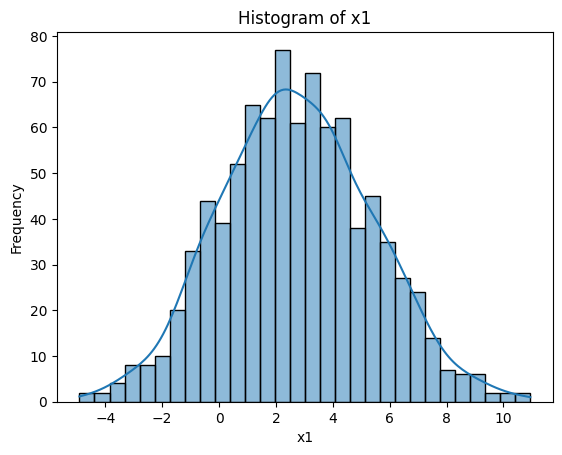

In [17]:
sns.histplot(df['x1'], bins=30, kde=True)
plt.xlabel('x1')
plt.ylabel('Frequency')
plt.title('Histogram of x1')
plt.show()

Plot in the same figure the histogram of two variables



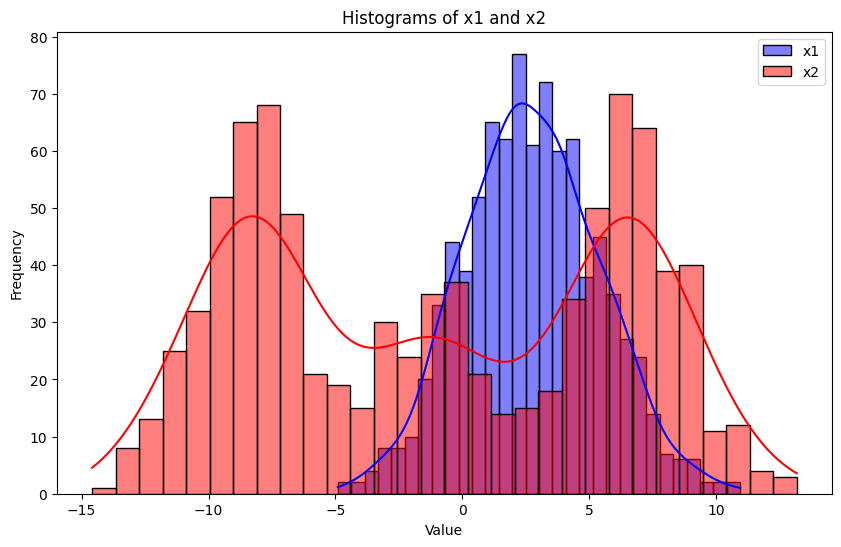

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['x1'], bins=30, kde=True, color='blue', label='x1', alpha=0.5)
sns.histplot(df['x2'], bins=30, kde=True, color='red', label='x2', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of x1 and x2')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:
El gráfico muestra que la variable **x1** tiene una distribución unimodal simétrica, concentrada alrededor de valores positivos, mientras que **x2** presenta una distribución bimodal, con picos en torno a **-10** y **6**. **x1** es más compacta y está concentrada en un rango más estrecho, mientras que **x2** tiene mayor dispersión, indicando la posible existencia de dos subgrupos de datos. Ambas variables comparten algunos valores entre **0** y **5**, pero en diferentes proporciones.

Plot the boxplot of one of the variables

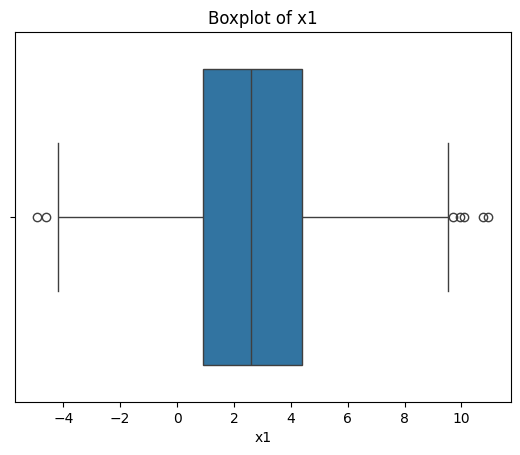

In [19]:
sns.boxplot(x=df['x1'])
plt.xlabel('x1')
plt.title('Boxplot of x1')
plt.show()

Plot in the same figure the boxplot of two variables

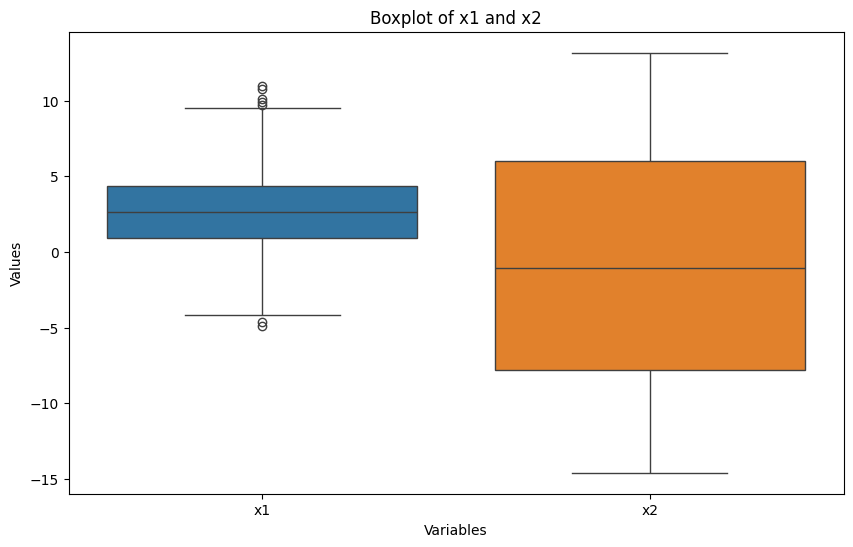

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['x1', 'x2']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of x1 and x2')
plt.show()

Based on these plots, provide a description of your data:

Your response here:
- x1 tiene menos variabilidad y los datos están más concentrados, aunque presenta algunos valores atípicos.
- x2 tiene una mayor dispersión de datos, con un rango más amplio, pero sin valores atípicos significativos.

El conjunto de datos puede representar dos grupos distintos de observaciones, donde x1 muestra una distribución más concentrada en comparación con x2, que es más variable.

Plot the scatter plot between all pair of variables

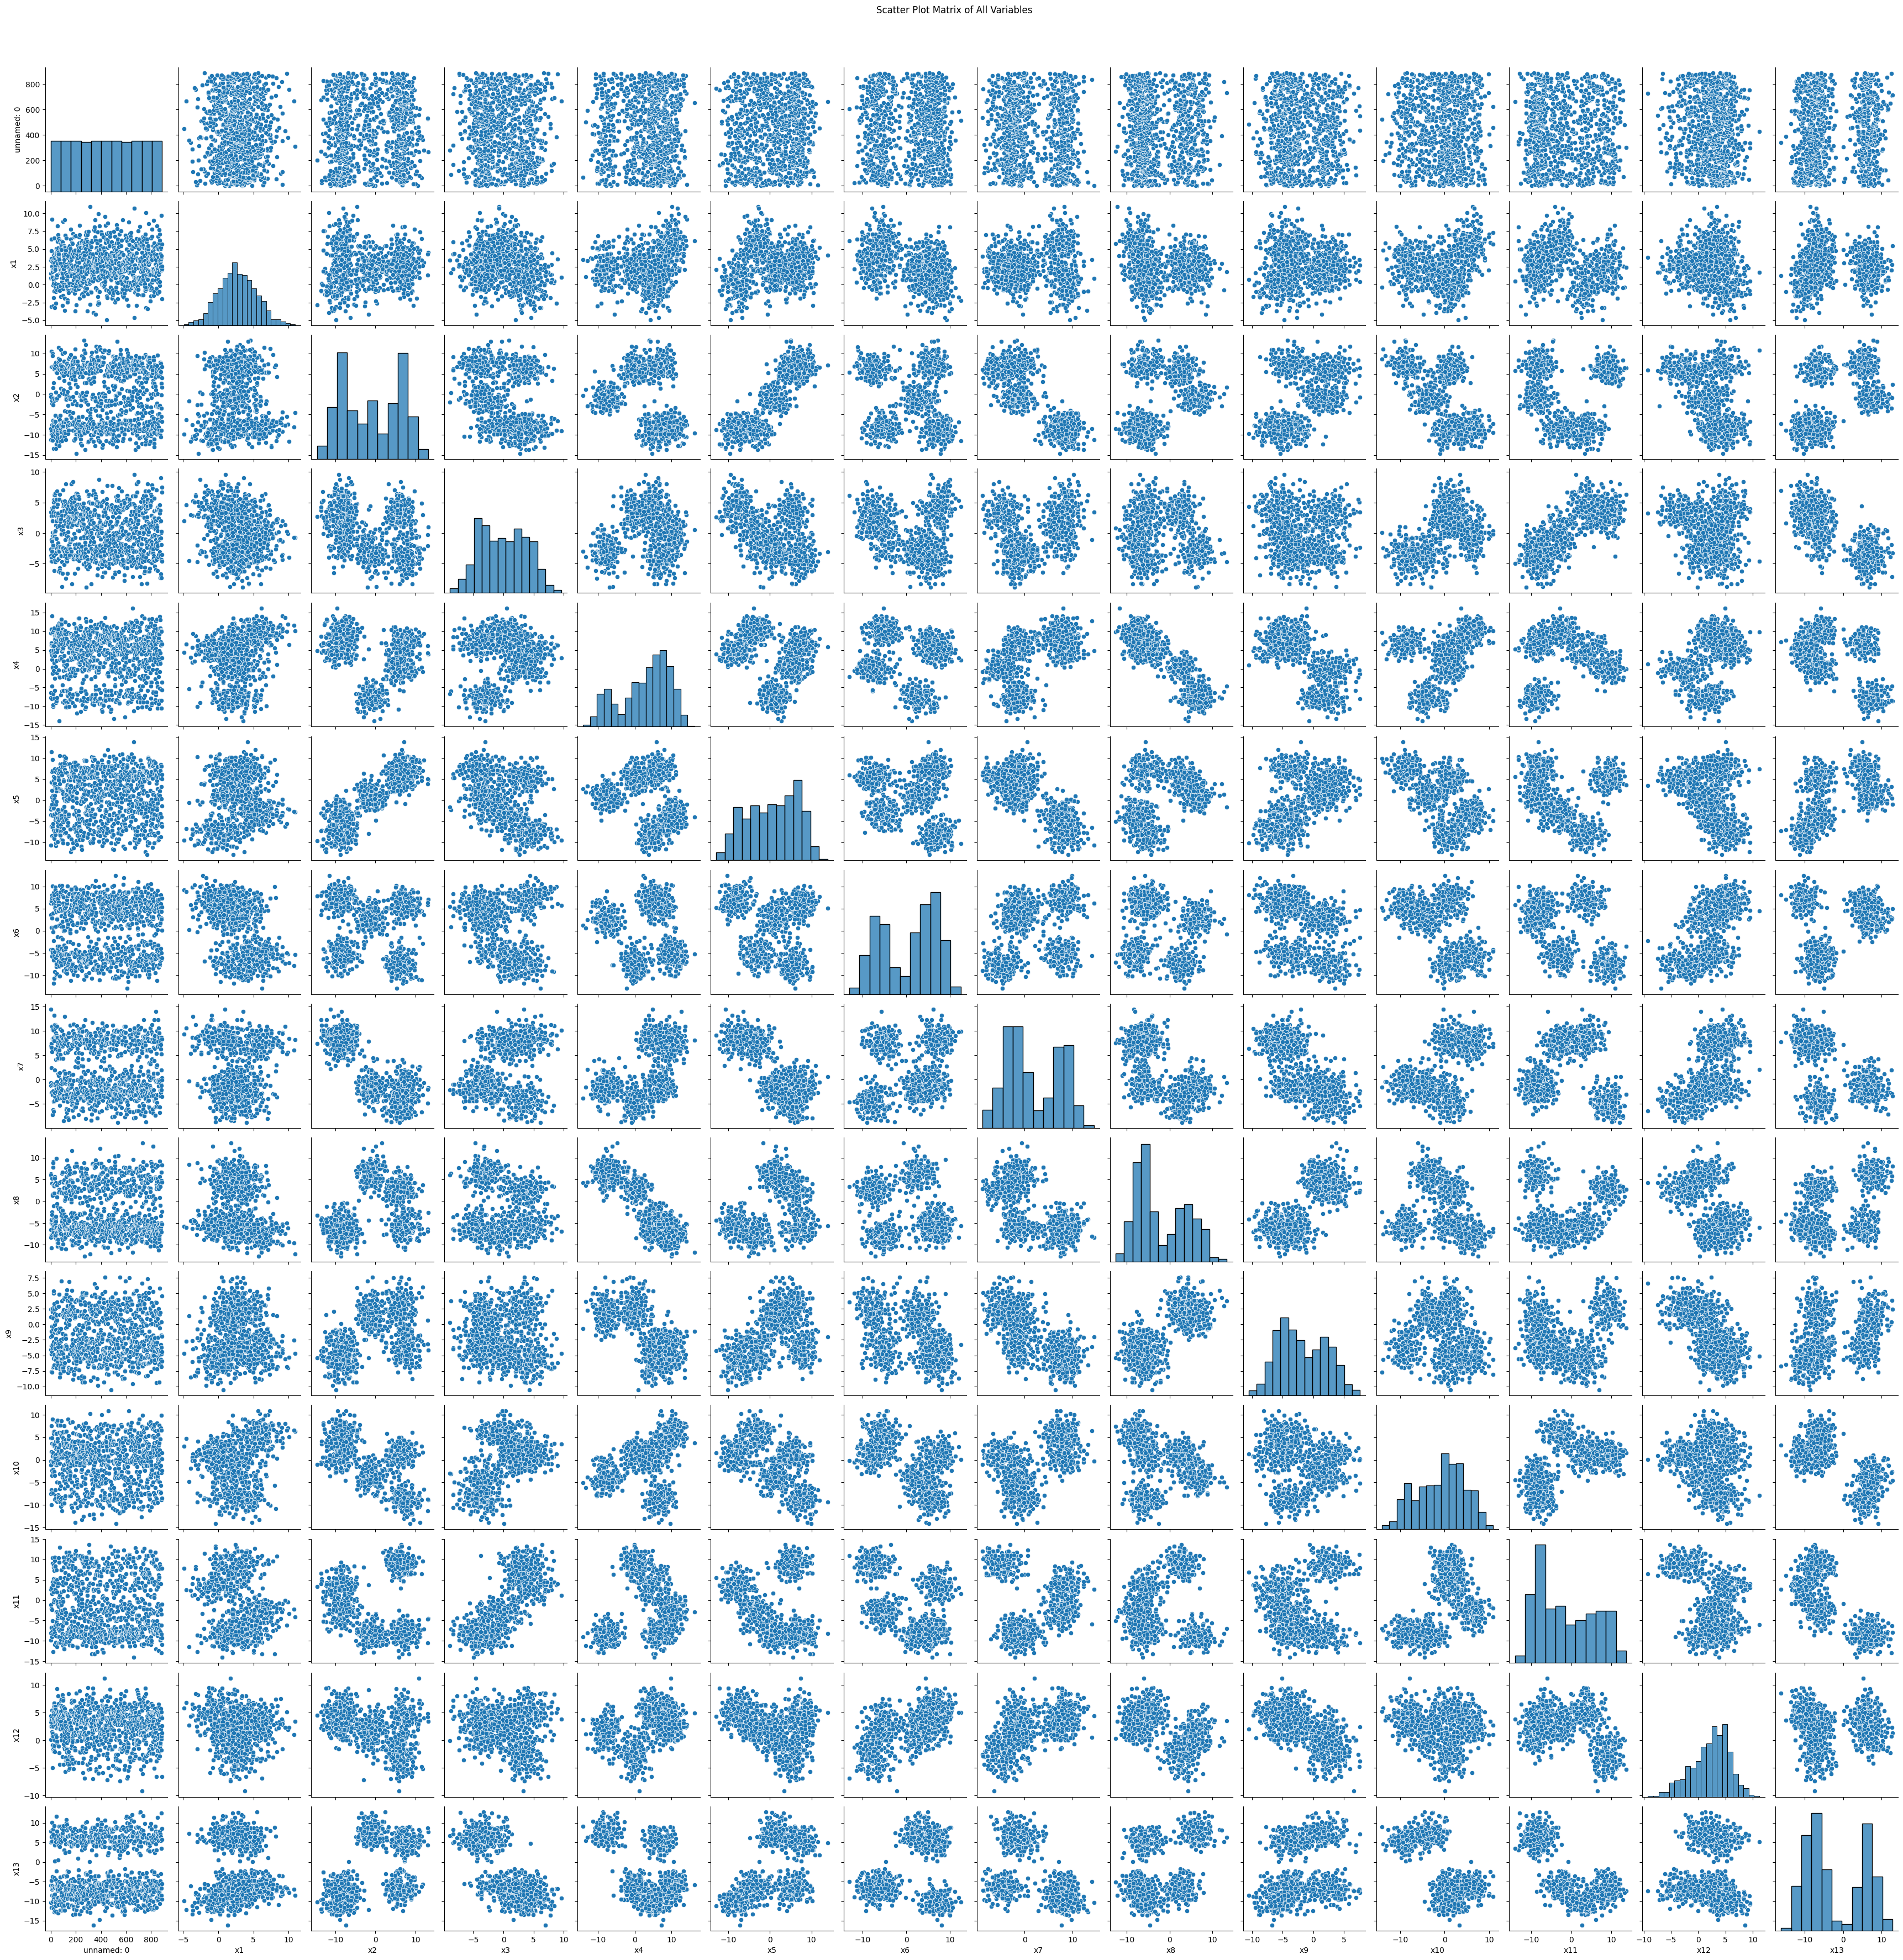

In [21]:
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix of All Variables', y=1.02)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:
- Las variables muestran patrones de distribución diferentes. Algunas tienen distribuciones normales (como x1), mientras que otras tienen agrupaciones más marcadas (como x2, x3).
- Existen relaciones complejas entre algunas variables, y en algunos casos, puede ser útil aplicar técnicas de análisis de correlación más avanzadas o de agrupamiento para comprender mejor las estructuras subyacentes.
- El gráfico también sugiere que podría haber estructuras categóricas o clústeres en el conjunto de datos, lo que sugiere que este conjunto podría estar segmentado en grupos claramente definidos.

En resumen, el conjunto de datos parece tener variabilidad tanto en términos de distribución individual como en las relaciones entre pares de variables, con evidencia de posibles clústeres o categorías.




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [23]:
from sklearn.cluster import KMeans

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])

print(df['cluster'].head())

0    1
1    1
2    0
3    0
4    2
Name: cluster, dtype: int32


Add to your dataset a column with the estimated cluster to each data point

In [25]:
df['cluster'] = kmeans.fit_predict(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])
print(df['cluster'].head())

0    1
1    1
2    0
3    0
4    2
Name: cluster, dtype: int32


Print the number associated to each cluster

In [26]:
print(df['cluster'].value_counts())

cluster
1    356
2    355
0    178
Name: count, dtype: int64


Print the centroids

In [27]:
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[ 2.30935896 -1.00809386 -3.07463312 -7.72778389  1.05914509  2.77408086
  -1.60430767  6.40484618]
 [ 2.89541278 -8.50197665  1.91958303  7.63203824 -5.66230267  0.96575683
   8.01569303 -6.45327629]
 [ 2.75313555  6.70705631 -0.30444498  3.44759353  6.42783002 -0.77942733
  -2.81014821 -1.62675921]]


Print the intertia metric

In [28]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 83267.58097921855


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

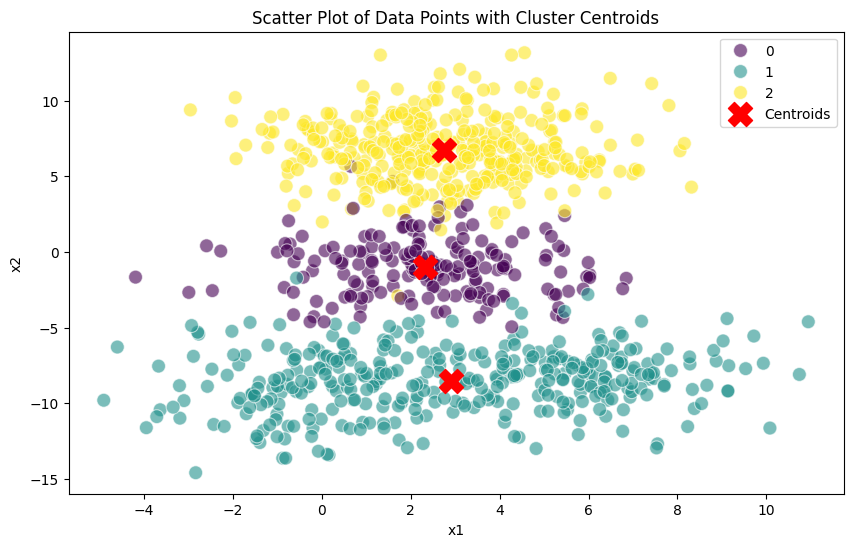

In [30]:

plt.figure(figsize=(10, 6))

sns.scatterplot(x='x1', y='x2', hue='cluster', data=df, palette='viridis', s=100, alpha=0.6, edgecolor='w')

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Data Points with Cluster Centroids')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:
1. Clusters:
Se identifican tres clústeres distintos, etiquetados como 0 (morado), 1 (verde azulado) y 2 (amarillo).
Los puntos dentro de cada clúster están distribuidos alrededor de los centroides, lo que indica que cada grupo tiene un centro de masa distinto.
Los clústeres parecen estar dispuestos de manera horizontal, diferenciándose principalmente a lo largo del eje y (variable x2), aunque también hay cierta dispersión en el eje x1.
2. Centroides:
Los centroides de cada clúster están representados por las grandes cruces rojas. Estos centroides son los puntos que minimizan la distancia promedio de todos los puntos de su clúster.
Los centroides de los clústeres están claramente diferenciados en el eje x2. El clúster amarillo tiene un centro más alto (cerca de y=5), el clúster morado está centrado en y=0, y el clúster verde azulado está alrededor de y=-10.
La posición del centroide sugiere que los clústeres están claramente separados a lo largo del eje x2, pero no tan notablemente a lo largo del eje x1.
3. Dispersión dentro de los clústeres:
El clúster amarillo tiene una mayor densidad y está bien agrupado alrededor de su centroide, con menor dispersión en comparación con los otros clústeres.
El clúster verde azulado tiene más dispersión en los valores de x1, y sus puntos están más esparcidos hacia los lados, lo que sugiere mayor variabilidad en este clúster.
El clúster morado es el más pequeño en número de puntos y está centrado más estrechamente alrededor del valor x1=0, lo que indica una menor dispersión.
4. Estructura global:
El análisis parece indicar que los datos se agrupan principalmente según la variable x2, con algunas diferencias menores en x1.
La clara separación vertical sugiere que los grupos tienen diferencias significativas en la dimensión representada por x2, mientras que las diferencias en x1 son más sutiles y no tan significativas en la separación de los clústeres.

Conclusiones:
Este gráfico representa los resultados de un análisis de agrupamiento, posiblemente utilizando un algoritmo como K-Means, ya que se muestran los centroides.
Los datos han sido divididos en tres clústeres, con buena separación a lo largo del eje x2, lo que sugiere que esta variable es un buen diferenciador entre los grupos.
Aunque existe alguna dispersión en el eje x1, la mayor parte de la variabilidad entre los clústeres se encuentra en la dimensión x2, lo que podría ser clave en la interpretación de estos grupos.

## d) Elbow plot

Compute the Elbow plot

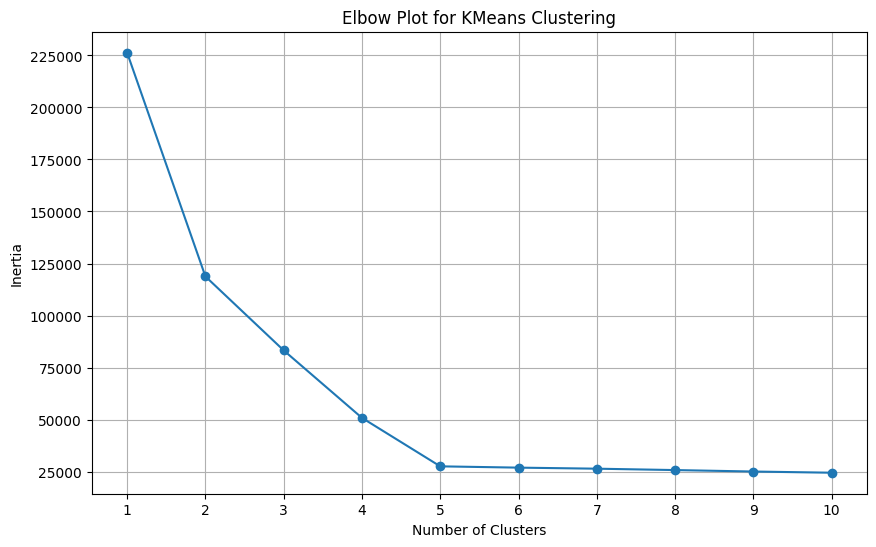

In [32]:
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### Questions

**Determining the Best Number of Clusters (K):**
To determine the optimal number of clusters (K), several methods can be used:

Elbow Method: This involves plotting the within-cluster sum of squares (WCSS) against different values of K. The ideal number of clusters is often found where the rate of decrease in WCSS slows down, forming an "elbow" in the graph. This point typically indicates that additional clusters do not significantly reduce the WCSS, suggesting a good balance between compactness and separability.

Silhouette Score: This measures how similar an object is to its own cluster compared to other clusters. The optimal number of clusters often maximizes the average silhouette score across all samples, indicating well-separated and cohesive clusters.

Gap Statistic: This compares the WCSS of clusters from the dataset with WCSS from randomly generated data. A higher gap value suggests a more distinct clustering structure.

Given the histogram analysis of x1 and x2, two clusters may be ideal due to the clear bimodal distribution observed in x2. However, to confirm, an Elbow or Silhouette analysis should be performed.


**Does This Agree with the Initial Guess?**
This guess does agree with the initial observation from the histogram. The bimodal pattern in x2 suggested two distinct groups, which aligns with choosing K = 2. If further analysis (like the Elbow method) confirmed K = 2 as optimal, it would reinforce this initial assumption.


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [33]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())

print(f'Data shape: {digits.data.shape}')
print(f'Target shape: {digits.target.shape}')

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)


2) Plot some of the observations (add in the title the label/digit of that obserbation)

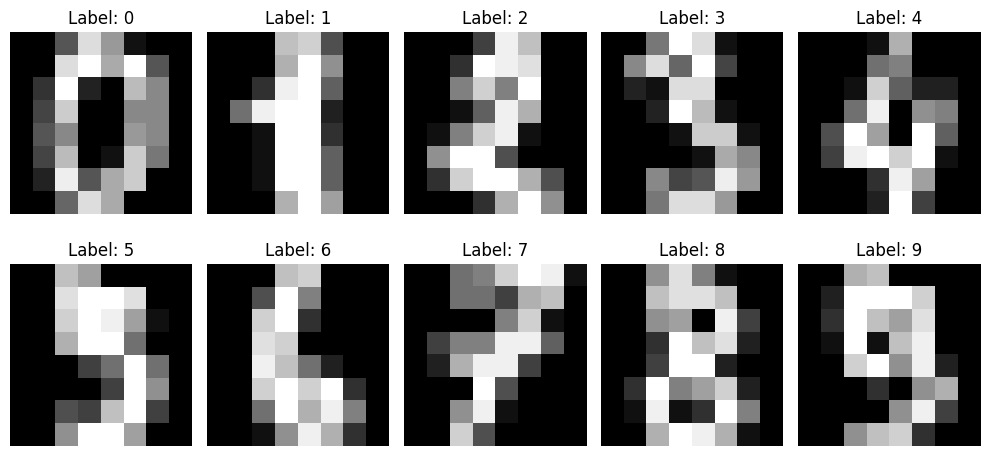

In [34]:
import matplotlib.pyplot as plt

num_observations = 10

plt.figure(figsize=(10, 5))
for i in range(num_observations):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [35]:
best_k = 10

kmeans_all = KMeans(n_clusters=best_k, random_state=42)
digits['KmeansAll'] = kmeans_all.fit_predict(digits.data)

kmeans_1row = KMeans(n_clusters=best_k, random_state=42)
digits['Kmeans1row'] = kmeans_1row.fit_predict(digits.data[:, :8])

kmeans_4row = KMeans(n_clusters=best_k, random_state=42)
digits['Kmeans4row'] = kmeans_4row.fit_predict(digits.data[:, 24:32])

kmeans_8row = KMeans(n_clusters=best_k, random_state=42)
digits['Kmeans8row'] = kmeans_8row.fit_predict(digits.data[:, 56:64])

print("KmeansAll:", digits['KmeansAll'][:10])
print("Kmeans1row:", digits['Kmeans1row'][:10])
print("Kmeans4row:", digits['Kmeans4row'][:10])
print("Kmeans8row:", digits['Kmeans8row'][:10])

KmeansAll: [5 7 7 6 4 9 2 0 8 9]
Kmeans1row: [2 9 3 1 5 4 9 0 1 4]
Kmeans4row: [8 1 7 3 9 1 4 0 6 5]
Kmeans8row: [3 5 6 5 0 1 5 2 1 7]


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

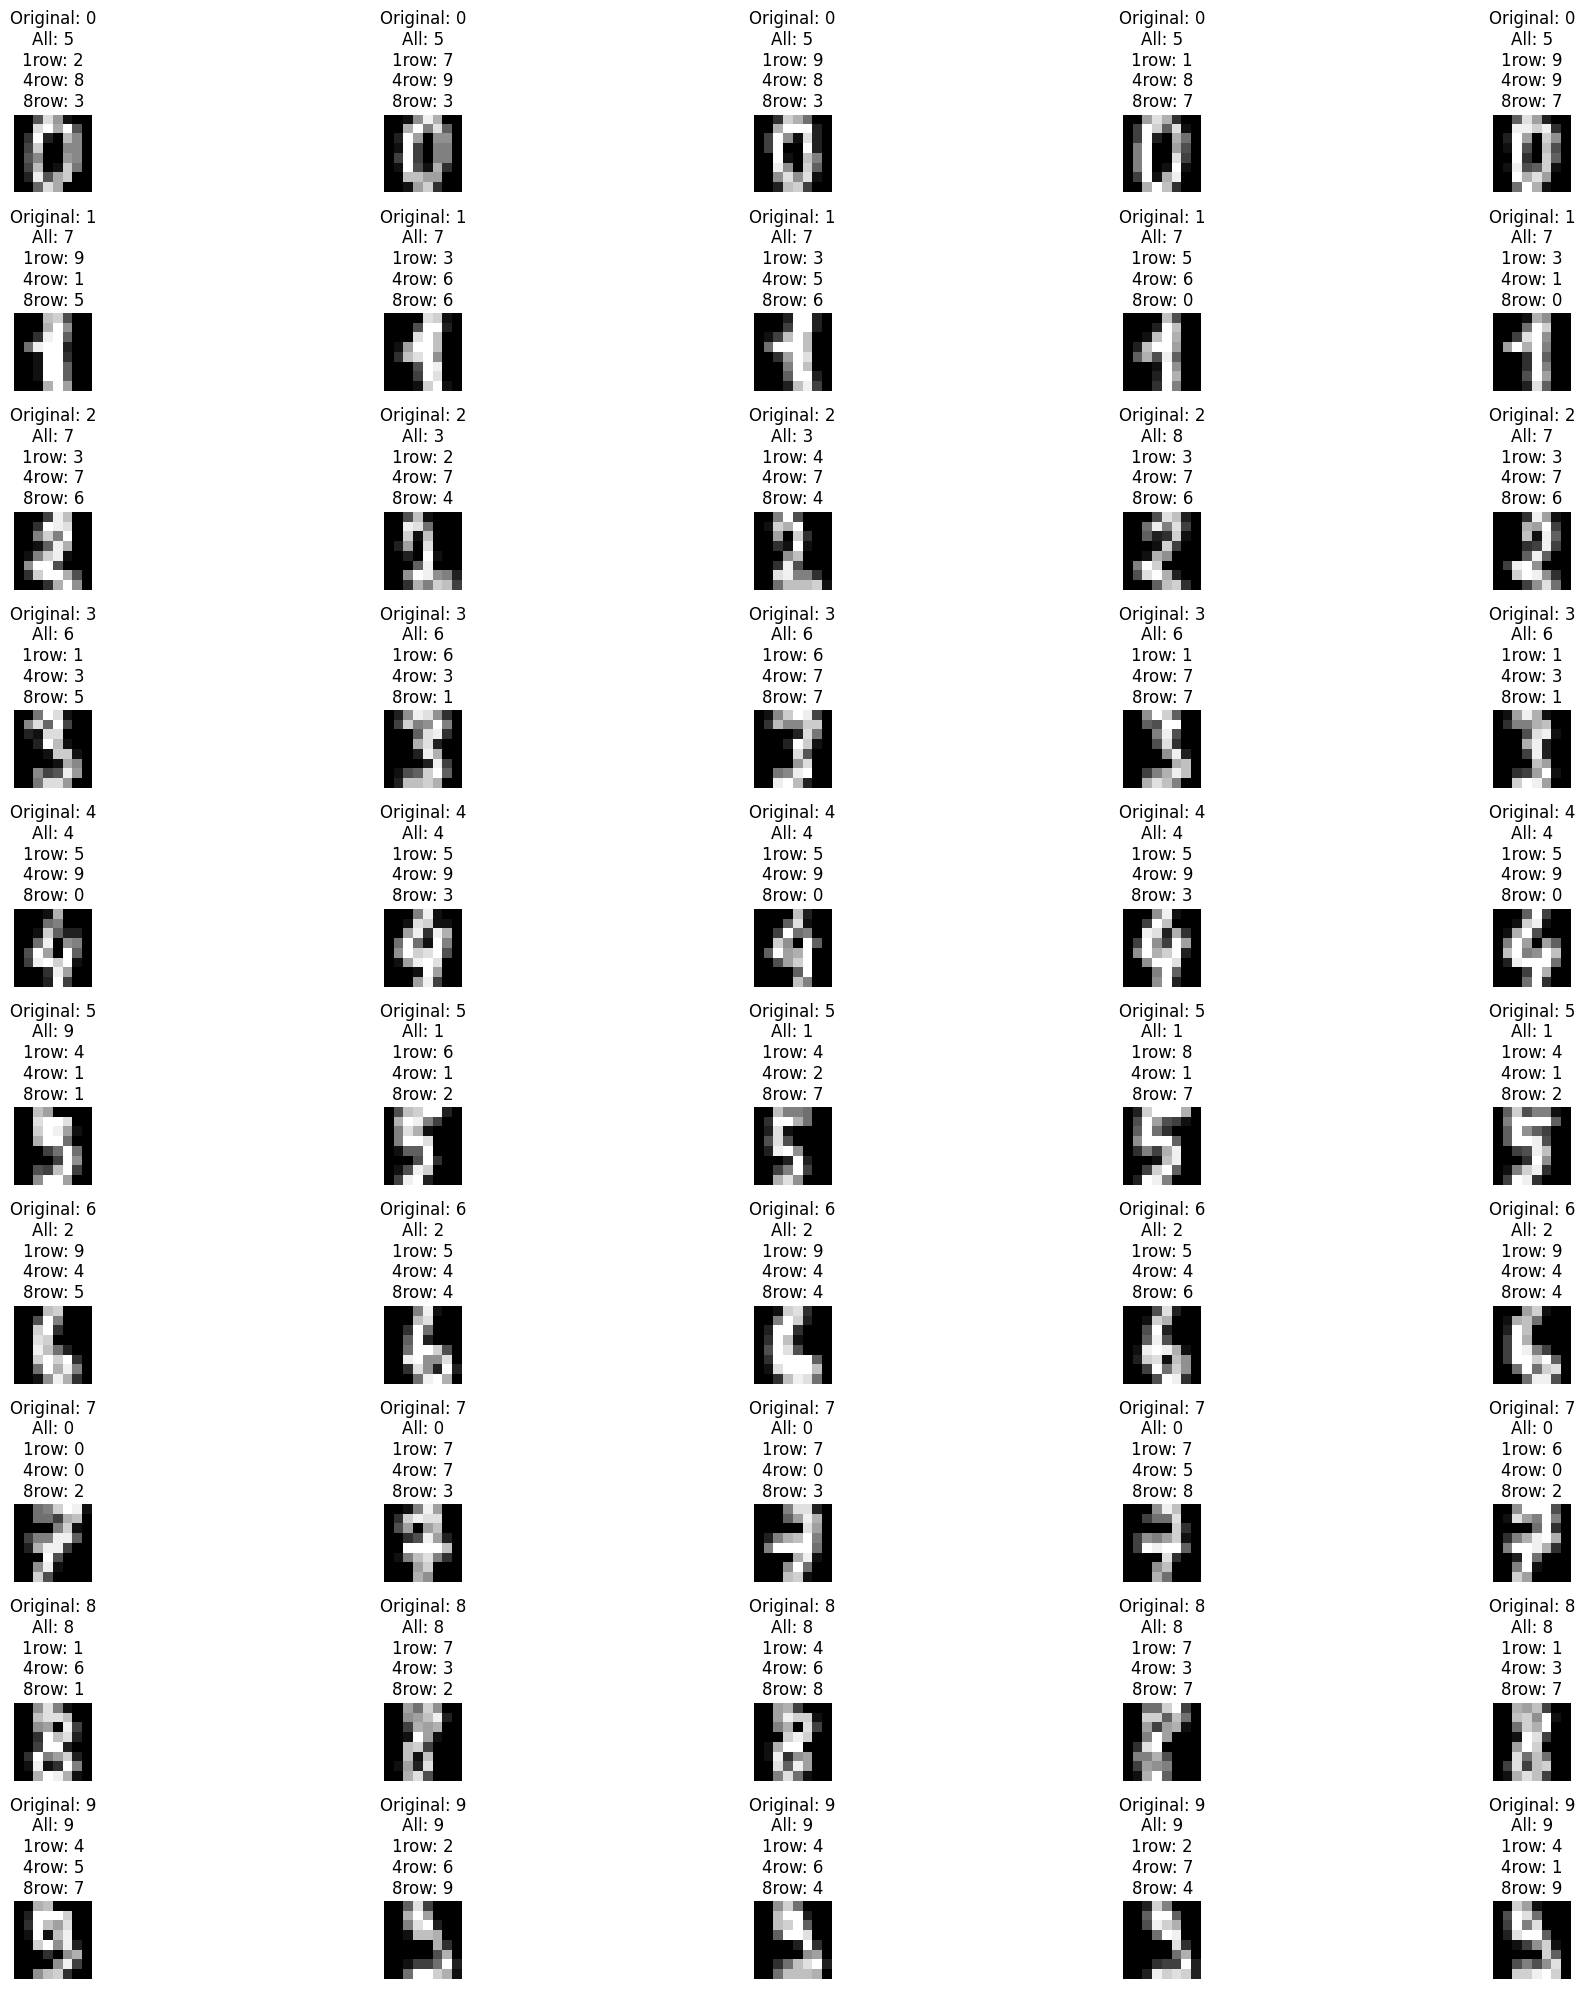

In [37]:
num_per_digit = 5

plt.figure(figsize=(20, 20))
for digit in range(10):
    digit_indices = np.where(digits.target == digit)[0][:num_per_digit]

    for i, idx in enumerate(digit_indices):
        plt.subplot(10, num_per_digit, digit * num_per_digit + i + 1)
        plt.imshow(digits.images[idx], cmap='gray')

        plt.title(f'Original: {digits.target[idx]}\nAll: {digits["KmeansAll"][idx]}\n1row: {digits["Kmeans1row"][idx]}\n4row: {digits["Kmeans4row"][idx]}\n8row: {digits["Kmeans8row"][idx]}')

        plt.axis('off')

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

In [ ]:
inertia_values_digits = []
cluster_range_digits = range(1, 21)

for k in cluster_range_digits:
    kmeans_digits = KMeans(n_clusters=k, random_state=42)
    kmeans_digits.fit(digits.data)
    inertia_values_digits.append(kmeans_digits.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range_digits, inertia_values_digits, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering on Digits Dataset')
plt.xticks(cluster_range_digits)
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):
El mejor enfoque para la clusterización es **KMeansAll**, ya que utiliza todo el conjunto de datos para calcular los centroides, lo cual garantiza una **mejor separación y cohesión de los clústeres**. Además, es **más robusto** frente a valores atípicos y ofrece **mayor generalización y estabilidad** en comparación con métodos como **KMeans1row**, **KMeans4row**, o **KMeans8row**, que solo usan una muestra limitada y pueden resultar menos precisos y más sensibles a la variabilidad.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [38]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())

print(f'Data shape: {digits.data.shape}')
print(f'Target shape: {digits.target.shape}')

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

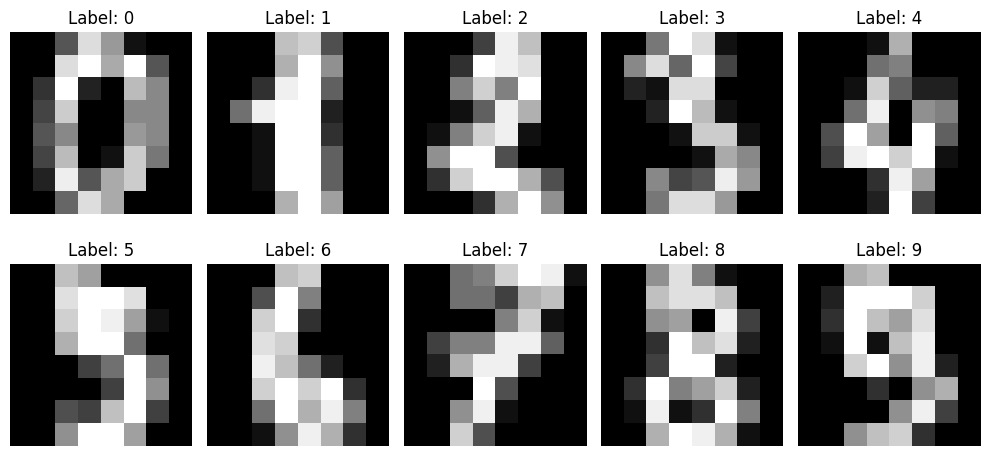

In [39]:
num_observations = 10

plt.figure(figsize=(10, 5))
for i in range(num_observations):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [40]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training data shape: (1257, 64)
Testing data shape: (540, 64)
Training labels shape: (1257,)
Testing labels shape: (540,)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)
y_pred_all = svm_classifier.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all}')

svm_classifier.fit(X_train[:, :8], y_train)
y_pred_1col = svm_classifier.predict(X_test[:, :8])
accuracy_1col = accuracy_score(y_test, y_pred_1col)
print(f'Accuracy with first column features: {accuracy_1col}')

svm_classifier.fit(X_train[:, 24:32], y_train)
y_pred_4col = svm_classifier.predict(X_test[:, 24:32])
accuracy_4col = accuracy_score(y_test, y_pred_4col)
print(f'Accuracy with fourth column features: {accuracy_4col}')

svm_classifier.fit(X_train[:, 56:64], y_train)
y_pred_8col = svm_classifier.predict(X_test[:, 56:64])
accuracy_8col = accuracy_score(y_test, y_pred_8col)
print(f'Accuracy with eighth column features: {accuracy_8col}')

Accuracy with all features: 0.9796296296296296
Accuracy with first column features: 0.3962962962962963
Accuracy with fourth column features: 0.6370370370370371
Accuracy with eighth column features: 0.5055555555555555


5) Make predictions (use the test set)

In [42]:

svm_classifier_all = SVC(kernel='linear', random_state=42)
svm_classifier_all.fit(X_train, y_train)
y_pred_all = svm_classifier_all.predict(X_test)
print(f'Predictions with all features: {y_pred_all[:10]}')

y_pred_1col = svm_classifier.predict(X_test[:, :8])
print(f'Predictions with first column features: {y_pred_1col[:10]}')

y_pred_4col = svm_classifier.predict(X_test[:, 24:32])
print(f'Predictions with fourth column features: {y_pred_4col[:10]}')

y_pred_8col = svm_classifier.predict(X_test[:, 56:64])
print(f'Predictions with eighth column features: {y_pred_8col[:10]}')

Predictions with all features: [6 9 3 7 2 1 5 2 5 2]
Predictions with first column features: [4 5 0 2 5 7 9 0 3 5]
Predictions with fourth column features: [3 3 0 2 4 5 5 1 5 4]
Predictions with eighth column features: [6 5 3 7 3 2 5 2 5 5]


6) Compute performance metrics

In [43]:
from sklearn.metrics import classification_report


print("Performance metrics for ClassifierAll:")
print(classification_report(y_test, y_pred_all))

print("Performance metrics for Classifier1col:")
print(classification_report(y_test, y_pred_1col))

print("Performance metrics for Classifier4col:")
print(classification_report(y_test, y_pred_4col))

print("Performance metrics for Classifier8col:")
print(classification_report(y_test, y_pred_8col))

Performance metrics for ClassifierAll:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Performance metrics for Classifier1col:
              precision    recall  f1-score   support

           0       0.24      0.36      0.29        53
           1       0.27      0.34      0.30        50

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

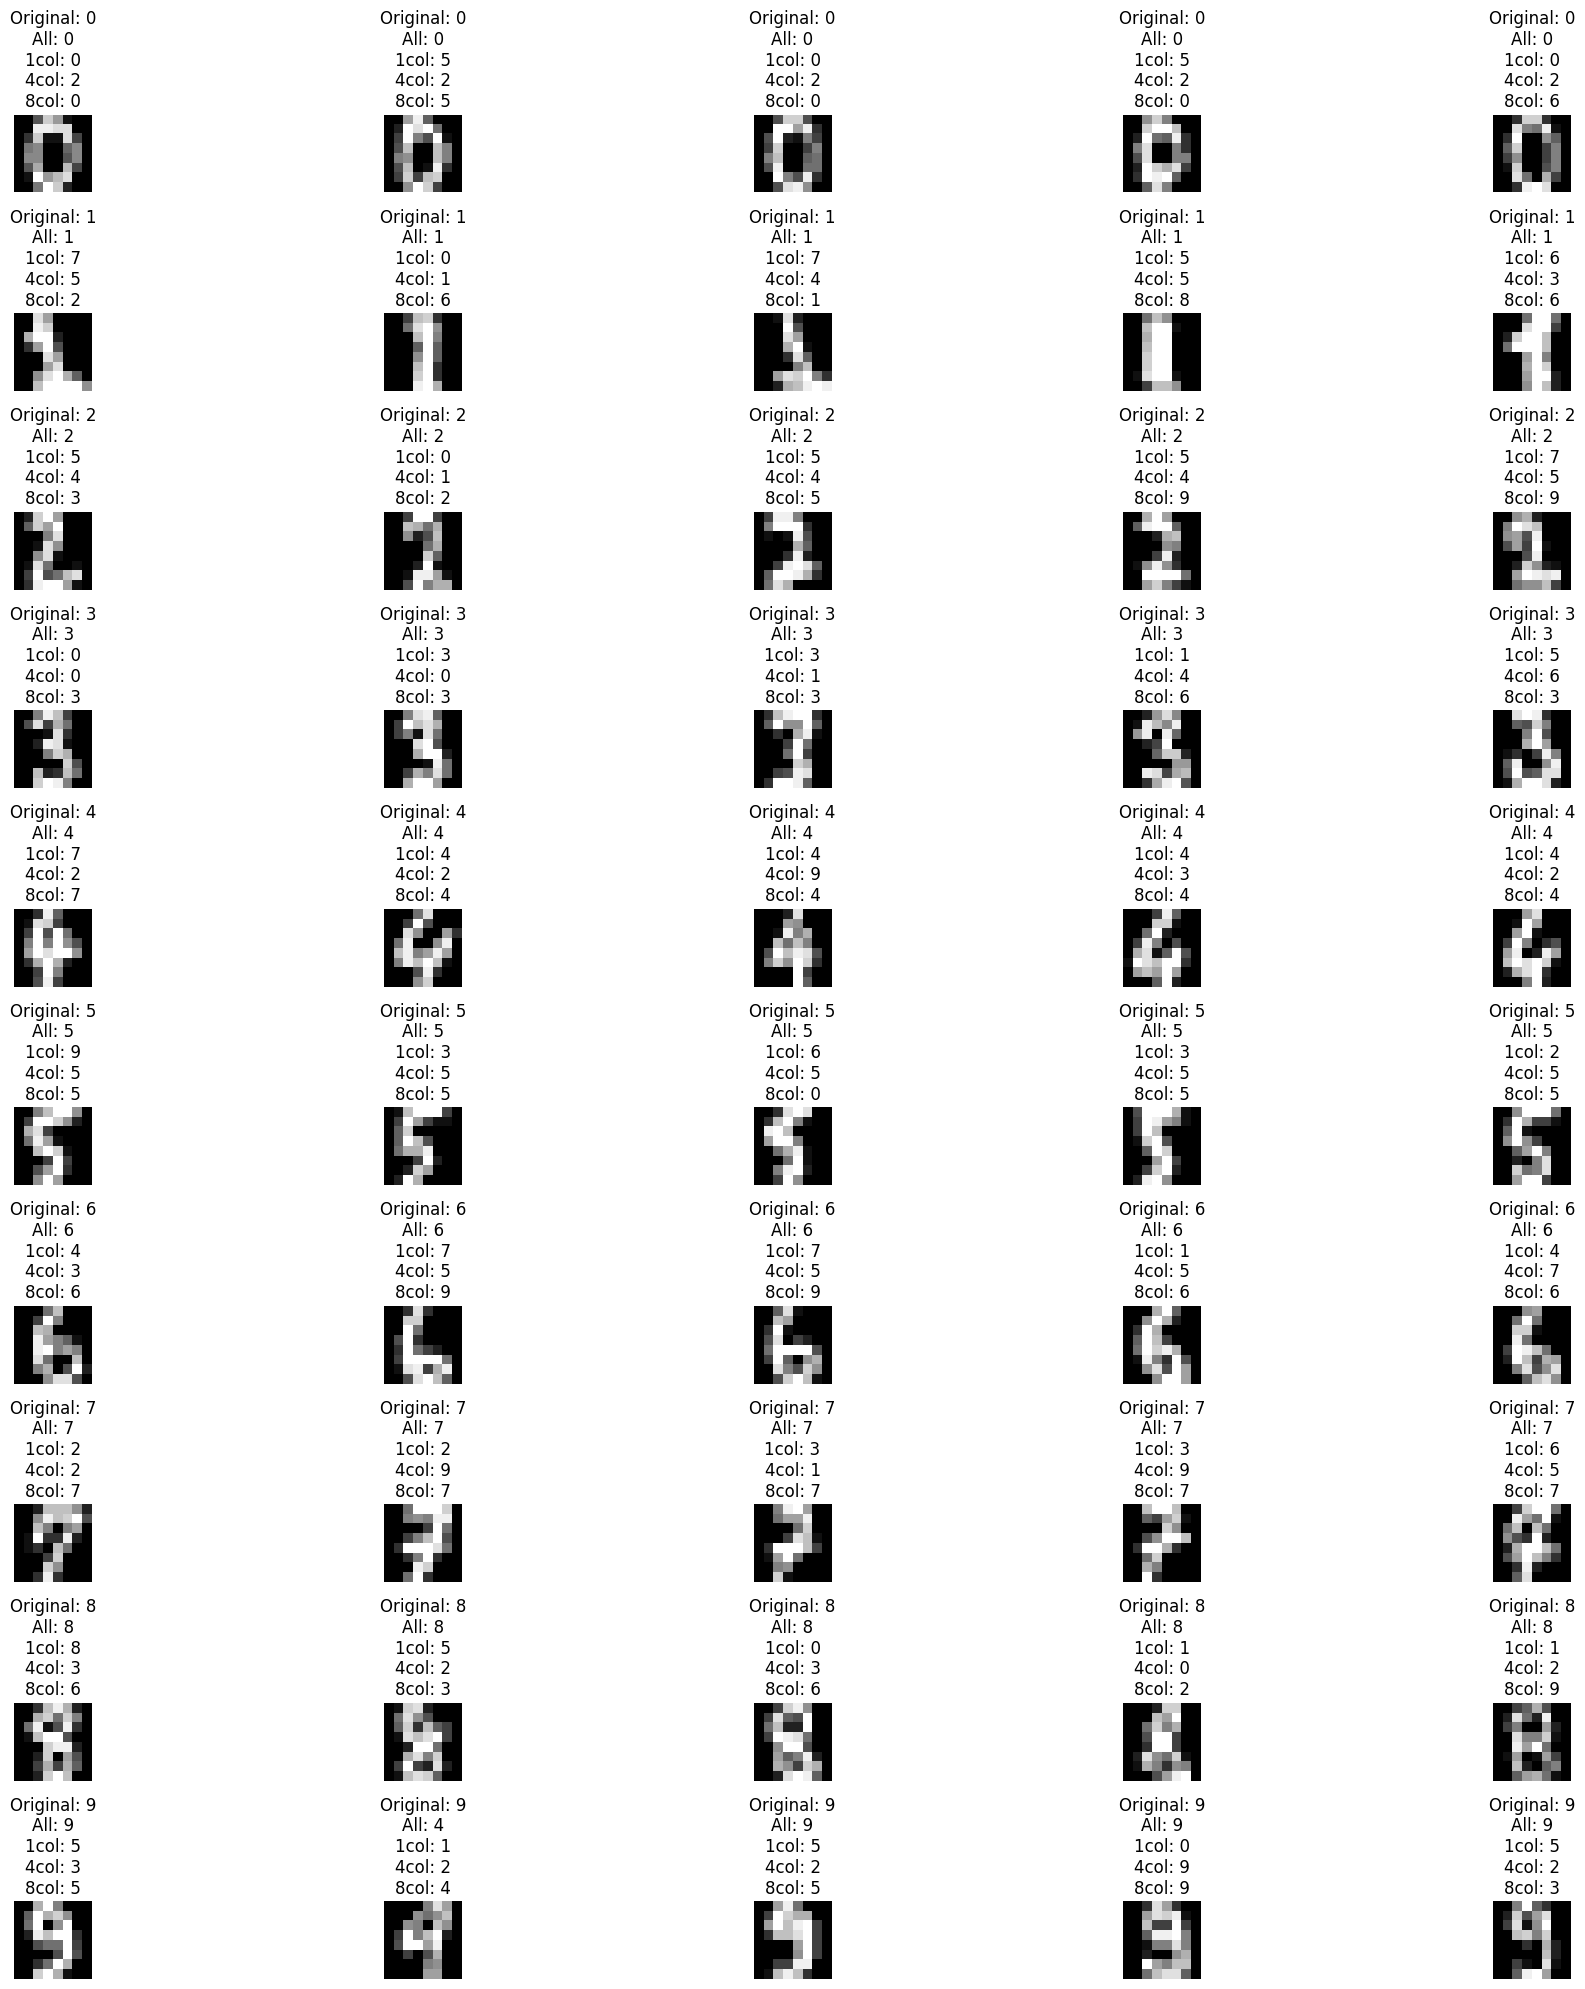

label: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 3 7

In [44]:
num_per_digit = 5

plt.figure(figsize=(20, 20))
for digit in range(10):
    digit_indices = np.where(y_test == digit)[0][:num_per_digit]

    for i, idx in enumerate(digit_indices):
        plt.subplot(10, num_per_digit, digit * num_per_digit + i + 1)
        plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')

        plt.title(f'Original: {y_test[idx]}\nAll: {y_pred_all[idx]}\n1col: {y_pred_1col[idx]}\n4col: {y_pred_4col[idx]}\n8col: {y_pred_8col[idx]}')

        plt.axis('off')

plt.tight_layout()
plt.show()

print("label:", y_test)
print("All:", y_pred_all)
print("1col:", y_pred_1col)
print("4col:", y_pred_4col)
print("8col:", y_pred_8col)

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):
**ClassifierAll** es el mejor en precisión ya que utiliza todos los datos, logrando una alta consistencia en las predicciones. **Classifier8col** es una buena alternativa, con un rendimiento similar al de ClassifierAll. **Classifier4col** tiene un rendimiento intermedio, y **Classifier1col** es el menos preciso debido a su información limitada. En conclusión, **ClassifierAll** es la opción más precisa, seguido de **Classifier8col**.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:
Considero que es buena, sin embargo me faltan muchos conceptos por entender ya que puedo comprender como hacer el codigo y las variables que debe de contener sin embargo me cuesta el interpretar una respuesta concreta.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:Si puedo desarrollar esos modelos, sin embargo, como ya se mencionó anteriormente me cuesta un poco la parte de la interpretación más que la parte de construcción.